##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic regression: Predict fuel efficiency

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/regression"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In a *regression* problem, the aim is to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This notebook uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, provide the model with a description of many automobiles from that time period. This description includes attributes like: cylinders, displacement, horsepower, and weight.

This example uses the `tf.keras` API, see [this guide](https://www.tensorflow.org/guide/keras) for details.

In [ ]:
# Use seaborn for pairplot 
!pip install -q seaborn #installs seaborn (Seaborn is a data visulazation tool based on matplotlib)

In [ ]:
import matplotlib.pyplot as plt #imports matplotlib into the project ( matplotlib is a python package that allows the creation of static, animated, and interactive visualizations ) 
import numpy as np #imports numpy into the project ( numpy is a python package that allows the usage of arrays and functions for working with linear algebra )
import pandas as pd #imports pandas into the project ( pandas is a python package that allows the usage of data analysis and manipulation tools )
import seaborn as sns #imports seaborn into the project ( seaborn is a python package that as stated above is a data visualization tool based on matplotlib; a high-level interface for drawing attractive and informative statistical graphics )

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf #imports tensorflow into the project ( tensorflow is a library of tools for hte usage of MACHINE-LEARNING )

from tensorflow import keras #imports keras into the project ( Keras is the high-level interface for developing and evaluating deep learning models; providing essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity )
from tensorflow.keras import layers #imports layers functionality from keras ( layers are the basic building blocks of neural networks in keras )
from tensorflow.keras.layers.experimental import preprocessing #importing preprocessing functionality from experimental which comes from layers ( Preprocessing allows developers to build input processing pipelines natively within Keras )

# Prints the current tensorflow version 
print(tf.__version__)

2.4.1


## The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).


### Get the data
First download and import the dataset using pandas:

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data' 
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset
#importing data from database and sorting by colmuns ( transforms raw data into useable data )

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
dataset = raw_dataset.copy()
dataset.tail()
#making a copy of raw dataset ( references the tail end of the data ~ gathering the most recent data entries )

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### Clean the data

The dataset contains a few unknown values.

In [ ]:
dataset.isna().sum()
#gathering data that has unknown/null values ()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Drop those rows to keep this initial tutorial simple.

In [ ]:
dataset = dataset.dropna()
#deletes gathered data ( deleting unknown/null values from data )

The `"Origin"` column is really categorical, not numeric. So convert that to a one-hot:

Note: You can set up the `keras.Model` to do this kind of transformation for you. That's beyond the scope of this tutorial. See the [preprocessing layers](../structured_data/preprocessing_layers.ipynb) or [Loading CSV data](../load_data/csv.ipynb) tutorials for examples.

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Russia', 3: 'Japan'})
#sorting data by countries 

In [ ]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()
#creates dummy variables in python for pandas ()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Japan,Russia,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


### Split the data into train and test

Now split the dataset into a training set and a test set.

Use the test set in the final evaluation of our models.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0) #what the frac (fraction of axis items to return) random state (c-value)
test_dataset = dataset.drop(train_dataset.index)
#splits the dataset into a training set and a test set

### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

Looking at the top row it should be clear that the fuel efficiency (MPG) is a function of all the other parameters. Looking at the other rows it should be clear that they are each functions of eachother.

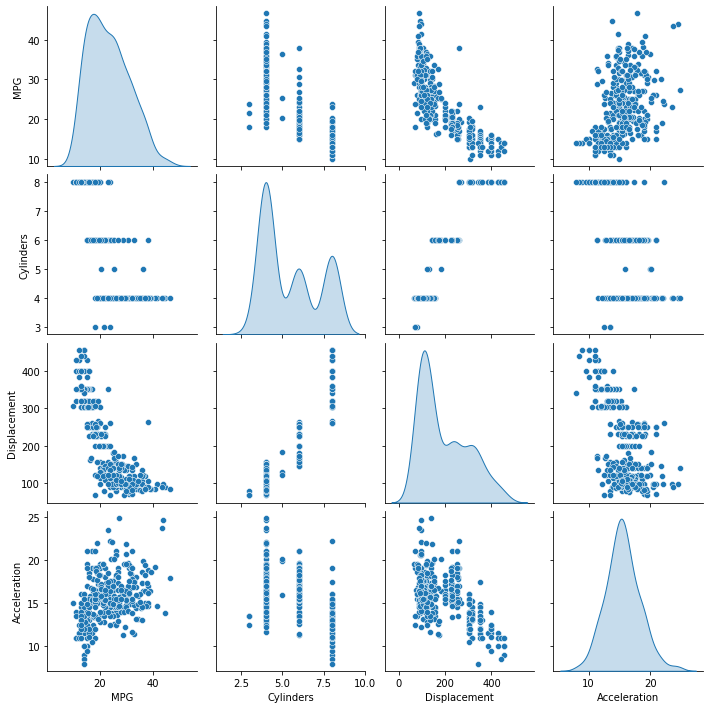

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Acceleration']], diag_kind='kde')
#creates a grid view for the dataset (x-axis for column, y-axis for row where each piece of data is situated in one row and column)

Also look at the overall statistics, note how each feature covers a very different range:

In [ ]:
train_dataset.describe().transpose()
#using the train dataset variable this function (looks over the overall statistics of dataset) 

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
Russia,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


### Split features from labels

Separate the target value, the "label", from the features. This label is the value that you will train the model to predict.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')
#separating the dataset from the labels and creating new variables for the labels using .pop ( .pop removes and returns last value of the list/index )

## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are.

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]
#looks at and returns mean and standard deviation 

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Japan,0.197452,0.398712
Russia,0.178344,0.383413
USA,0.624204,0.485101


It is good practice to normalize features that use different scales and ranges. 

One reason this is important is because the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs. 

Although a model *might* converge without feature normalization, normalization makes training much more stable. 

### The Normalization layer
The `preprocessing.Normalization` layer is a clean and simple way to build that preprocessing into your model.

The first step is to create the layer:

In [ ]:
normalizer = preprocessing.Normalization()
#redistributes inputs so that the data is centred around 0 with a standard distribution of 1 (normal distribution) by precomputing the mean and variance of the data, and calling (input-mean)/sqrt(var)

Then `.adapt()` it to the data:

In [ ]:
normalizer.adapt(np.array(train_features))
#adapts dataset (by weighing the layer by its mean and variance)

This calculates the mean and variance, and stores them in the layer. 

In [ ]:
print(normalizer.mean.numpy())
#prints mean and varianace and stores them

[   5.478  195.318  104.869 2990.252   15.559   75.898    0.197    0.178
    0.624]


When the layer is called it returns the input data, with each feature independently normalized:

In [ ]:
first = np.array(train_features[:1])
#pulling the first two entries in the dataset and storing to the variable "first" 

with np.printoptions(precision=2, suppress=True): #np.printoptions determines the print parameters (precision is the number of decimal places, suppress if "true" will print the float point numbers with fixed point notation)
  print('First example:', first) #prints the 'First example:' and the result of the variable "first"
  print()
  print('Normalized:', normalizer(first).numpy()) #prints 'Normalized:', runs the variable first through normalizer and prints the result
  

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.5  -0.47  0.78]]


## Linear regression

Before building a DNN model, start with a linear regression.

### One Variable

Start with a single-variable linear regression, to predict `MPG` from `Horsepower`.

Training a model with `tf.keras` typically starts by defining the model architecture.

In this case use a `keras.Sequential` model. This model represents a sequence of steps. In this case there are two steps:

* Normalize the input `horsepower`.
* Apply a linear transformation ($y = mx+b$) to produce 1 output using `layers.Dense`.

The number of _inputs_ can either be set by the `input_shape` argument, or automatically when the model is run for the first time.

First create the horsepower `Normalization` layer:

In [ ]:
horsepower = np.array(train_features['Horsepower']) #setting the variable 'Horsepower' (originates from train features array)

horsepower_normalizer = preprocessing.Normalization(input_shape=[1,]) #applies single dimension (setting the normalization variable to horsepower_normalizer)
horsepower_normalizer.adapt(horsepower) #using .adapt on horsepower variable (we are applying the result to the "horsepower_normalizer" variable) 

Build the sequential model:

In [ ]:
horsepower_model = tf.keras.Sequential([ #sequential groups linear stacks of layers into a model (group the horsepower_normalizer into a one layer unit)
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary() #retrieve summary 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict `MPG` from `Horsepower`.

Run the untrained model on the first 10 horse-power values. The output won't be good, but you'll see that it has the expected shape, `(10,1)`:

In [ ]:
horsepower_model.predict(horsepower[:50])
#runs the untrained model on the first 50 horse-power values 

array([[-0.47 ],
       [-0.265],
       [ 0.867],
       [-0.658],
       [-0.595],
       [-0.234],
       [-0.705],
       [-0.595],
       [-0.155],
       [-0.265],
       [-0.705],
       [ 1.181],
       [-0.265],
       [ 0.709],
       [ 0.788],
       [-0.47 ],
       [ 0.159],
       [ 0.709],
       [-0.234],
       [-0.234],
       [ 0.379],
       [ 0.081],
       [-0.234],
       [ 0.081],
       [-0.454],
       [ 0.945],
       [-0.202],
       [-0.265],
       [-0.077],
       [ 0.709],
       [ 0.269],
       [-0.485],
       [-0.454],
       [-0.595],
       [ 0.081],
       [-0.234],
       [-0.627],
       [ 0.709],
       [ 0.709],
       [ 1.81 ],
       [ 0.945],
       [-0.595],
       [-0.47 ],
       [ 0.552],
       [-0.422],
       [ 0.694],
       [-0.328],
       [ 0.709],
       [ 0.631],
       [-0.077]], dtype=float32)

Once the model is built, configure the training procedure using the `Model.compile()` method. The most important arguments to compile are the `loss` and the `optimizer` since these define what will be optimized (`mean_absolute_error`) and how (using the `optimizers.Adam`).

In [ ]:
horsepower_model.compile( 
    optimizer=tf.optimizers.Adam(learning_rate=0.1), #optimizer that apples the "Adam" algorithm (Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models) learning rate (percentage rate of optimizer change over time)
    loss='mean_absolute_error') #setting the variable loss to 'mean_absolute_error' 


Once the training is configured, use `Model.fit()` to execute the training:

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 50% of the training data
    validation_split = 0.5)
#exectues training

CPU times: user 7.29 s, sys: 225 ms, total: 7.51 s
Wall time: 7.37 s


Visualize the model's training progress using the stats stored in the `history` object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
#returns the visualization of the tail end of the epoch's training history 

,loss,val_loss,epoch
95,3.719572,4.029790,95
96,3.718755,4.029213,96
97,3.721676,4.025383,97
98,3.721238,4.028252,98
99,3.720672,4.029859,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 5.0])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  #plotting the history of the variable loss (setting the x-axis as 'Epoch', y-axis 'Error [MPG]')

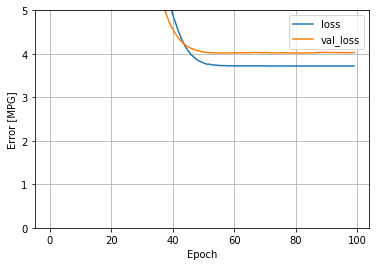

In [ ]:
plot_loss(history)
#returns PLOT 

Collect the results on the test set, for later:

In [ ]:
test_results = {} #setting test_results as executable

test_results['horsepower_model'] = horsepower_model.evaluate( #putting in 'horsepower_model' in test_results
    test_features['Horsepower'],
    test_labels, verbose=0) #verbose is set to 0 (adding no extra information)

Since this is a single variable regression it's easy to look at the model's predictions as a function of the input:

In [ ]:
x = tf.linspace(0.0, 250, 251) #generating a row vector of 251 points, between 0.0 and 250
y = horsepower_model.predict(x) #runs horsepower_model.predict on variable 'x'

In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()
  #sets up a scatterplot 

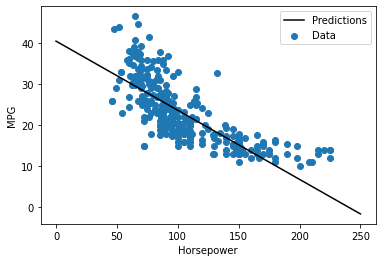

In [ ]:
plot_horsepower(x,y)
#returns the plot 

### Multiple inputs

You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same $y = mx+b$ except that $m$ is a matrix and $b$ is a vector.

This time use the `Normalization` layer that was adapted to the whole dataset.

In [ ]:
linear_model = tf.keras.Sequential([ #sequential groups linear stacks of layers into a model (group the normalizer into a one layer unit)
    normalizer,
    layers.Dense(units=1)
])

When you call this model on a batch of inputs, it produces `units=1` outputs for each example.

In [ ]:
linear_model.predict(train_features[:50]) #runs the untrained model with the first 50 values

array([[ 0.452],
       [ 0.158],
       [-0.657],
       [ 1.238],
       [ 0.594],
       [ 0.199],
       [ 0.595],
       [-0.503],
       [-0.008],
       [-0.446],
       [-0.654],
       [-0.369],
       [ 0.132],
       [-0.666],
       [-0.178],
       [ 1.066],
       [-0.357],
       [-0.496],
       [-0.367],
       [ 0.281],
       [ 0.379],
       [-0.616],
       [-0.811],
       [ 0.566],
       [ 0.551],
       [-0.597],
       [ 0.646],
       [ 0.344],
       [-0.028],
       [-0.092],
       [ 0.152],
       [ 0.476],
       [-0.704],
       [ 0.086],
       [-0.011],
       [ 0.536],
       [-0.237],
       [-0.383],
       [ 0.003],
       [-1.324],
       [-0.62 ],
       [ 1.219],
       [ 0.489],
       [-0.133],
       [ 0.289],
       [-0.22 ],
       [ 0.676],
       [-0.489],
       [ 0.269],
       [-0.061]], dtype=float32)

When you call the model it's weight matrices will be built. Now you can see that the `kernel` (the $m$ in $y=mx+b$) has a shape of `(9,1)`.

In [ ]:
linear_model.layers[1].kernel #kernel is a weight matrix created by the layer 

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.374],
       [-0.344],
       [-0.507],
       [ 0.011],
       [-0.404],
       [ 0.323],
       [ 0.216],
       [ 0.055],
       [ 0.244]], dtype=float32)>

Use the same `compile` and `fit` calls as for the single input `horsepower` model:

In [ ]:
linear_model.compile( #look above to horsepower_model.compile step
    optimizer=tf.optimizers.Adam(learning_rate=0.7),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 50% of the training data
    validation_split = 0.5)

CPU times: user 7.07 s, sys: 165 ms, total: 7.24 s
Wall time: 6.96 s


Using all the inputs achieves a much lower training and validation error than the `horsepower` model: 

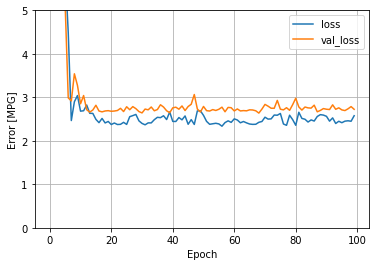

In [ ]:
plot_loss(history)
#returns PLOT 

Collect the results on the test set, for later:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)
#puts linear model through test_results(where linear_model = the evaluation of test_features and test_labels) with verbose=0 (adding no extar information)

## A DNN regression

The previous section implemented linear models for single and multiple inputs.

This section implements single-input and multiple-input DNN models. The code is basically the same except the model is expanded to include some "hidden"  non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalization layer.
* Two hidden, nonlinear, `Dense` layers using the `relu` nonlinearity.
* A linear single-output layer.

Both will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [ ]:
def build_and_compile_model(norm): #deep neural networks
  model = keras.Sequential([ #sequential groups linear stacks of layers into a model (group the normalizer into a one layer unit)
      norm,
      layers.Dense(128, activation='relu'), 
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

### One variable

Start with a DNN model for a single input: "Horsepower"

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer) #setting "dnn_horsepower_model" variable to the output "build_and_compile_model(horsepower_normalizer)" (to make a model based off the horsepower_normalizer)

This model has quite a few more trainable parameters than the linear models.

In [ ]:
dnn_horsepower_model.summary() #summarizes model output ()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 16,900
Trainable params: 16,897
Non-trainable params: 3
_________________________________________________________________


Train the model:

In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.5,
    verbose=0, epochs=100)  # suppress logging and calculate validation results on 50% of the training data

CPU times: user 7.21 s, sys: 188 ms, total: 7.4 s
Wall time: 6.99 s


This model does slightly better than the linear-horsepower model.

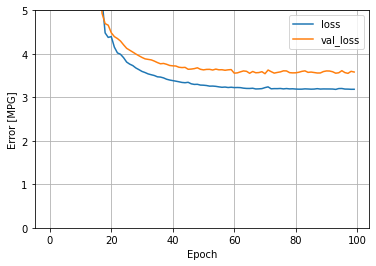

In [ ]:
plot_loss(history) #returns plot

If you plot the predictions as a function of `Horsepower`, you'll see how this model takes advantage of the nonlinearity provided by the hidden layers:

In [ ]:
x = tf.linspace(0.0, 250, 398) #generating a row vector of 398 points, between 0.0 and 250
y = dnn_horsepower_model.predict(x) #runs dnn_horsepower_model.predict on variable 'x'

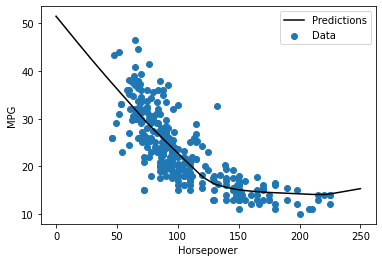

In [ ]:
plot_horsepower(x, y) #returns the plot 

Collect the results on the test set, for later:

In [ ]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate( #putting in 'dnn_horsepower_model' in test_results
    test_features['Horsepower'], test_labels,
    verbose=0) #verbose is set to 0 (adding no extra information)

### Full model

If you repeat this process using all the inputs it slightly improves the performance on the validation dataset.

In [ ]:
dnn_model = build_and_compile_model(normalizer) #setting "dnn_model" variable to the output "build_and_compile_model(normalizer)" (to make a model based off the normalizer)
dnn_model.summary() #summarizes model output ()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 17,940
Trainable params: 17,921
Non-trainable params: 19
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.5,
    verbose=0, epochs=100) # suppress logging and calculate validation results on 50% of the training data (change verbose for presentation purposes only)

CPU times: user 7.58 s, sys: 200 ms, total: 7.78 s
Wall time: 7.38 s


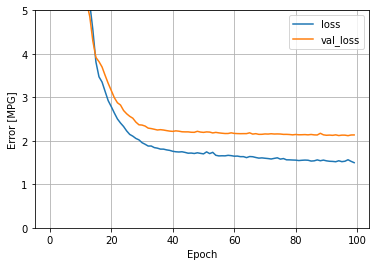

In [ ]:
plot_loss(history) #returns the PLOT 

Collect the results on the test set:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0) #putting in 'dnn_model' in test_results

## Performance

Now that all the models are trained check the test-set performance and see how they did:

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T #returns the visualization of the tail end of the epoch's training history 

,Mean absolute error [MPG]
horsepower_model,3.581184
linear_model,2.389482
dnn_horsepower_model,2.932442
dnn_model,1.830321


These results match the validation error seen during training.

### Make predictions

Finally, predict have a look at the errors made by the model when making predictions on the test set:

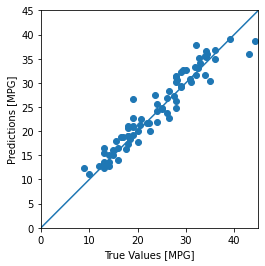

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten() #drawing the model as a line graph

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 45]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


It looks like the model predicts reasonably well. 

Now take a look at the error distribution:

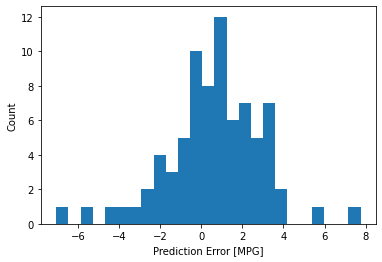

In [ ]:
error = test_predictions - test_labels 
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count') 
#returns plot with error distrbutions in a histogram

If you're happy with the model save it for later use:

In [ ]:
dnn_model.save('dnn_model') #saves the model  as 'dnn_model' 

INFO:tensorflow:Assets written to: dnn_model/assets


If you reload the model, it gives identical output:

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model') #reloads the model 

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T #pulling up the data frame

,Mean absolute error [MPG]
horsepower_model,3.581184
linear_model,2.389482
dnn_horsepower_model,2.932442
dnn_model,1.830321
reloaded,1.830321


## Conclusion

This notebook introduced a few techniques to handle a regression problem. Here are a few more tips that may help:

* [Mean Squared Error (MSE)](https://www.tensorflow.org/api_docs/python/tf/losses/MeanSquaredError) and [Mean Absolute Error (MAE)](https://www.tensorflow.org/api_docs/python/tf/losses/MeanAbsoluteError) are common loss functions used for regression problems. Mean Absolute Error is less sensitive to outliers. Different loss functions are used for classification problems.
* Similarly, evaluation metrics used for regression differ from classification.
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* Overfitting is a common problem for DNN models, it wasn't a problem for this tutorial. See the [overfit and underfit](overfit_and_underfit.ipynb) tutorial for more help with this.
